In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [68]:
content = pd.read_csv('title.basics.tsv',sep='\t',low_memory=False)
content.head()
content.shape

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


(11665850, 9)

In [69]:
content = content.replace('\\N', pd.NA)

In [70]:
empty = content.isna().sum().to_frame()
empty.columns = ['null_counts']
empty.index.name = 'col_name' 
total = content.shape[0] 
empty['null_percent'] = np.round((empty['null_counts']/total)*100,4)
empty

,null_counts,null_percent
col_name,,
tconst,0,0.0000
titleType,0,0.0000
primaryTitle,20,0.0002
originalTitle,20,0.0002
isAdult,1,0.0000
startYear,1431155,12.2679
endYear,11524718,98.7902
runtimeMinutes,7825852,67.0834
genres,517827,4.4388


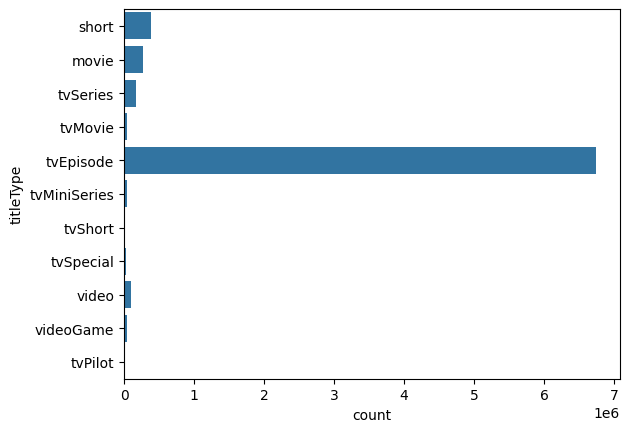

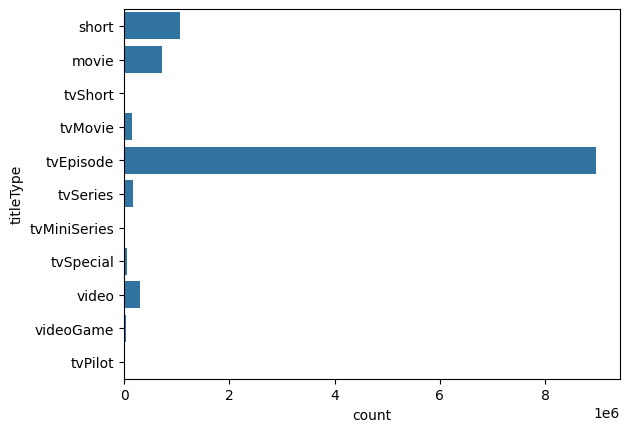

In [71]:
empty_runtime = content[content.runtimeMinutes.isna()]
sns.countplot(empty_runtime['titleType'])
plt.show();
empty_endyear = content[content.endYear.isna()]
sns.countplot(empty_endyear['titleType'])
plt.show();

In [72]:
content = content[content['titleType'] != 'tvEpisode']
content = content.dropna(subset=content.columns.difference(['endYear']))
empty['null_counts'] = content.isna().sum()
empty['null_percent'] = np.round((empty['null_counts']/total)*100,4)
empty

,null_counts,null_percent
col_name,,
tconst,0,0.0000
titleType,0,0.0000
primaryTitle,0,0.0000
originalTitle,0,0.0000
isAdult,0,0.0000
startYear,0,0.0000
endYear,1484388,12.7242
runtimeMinutes,0,0.0000
genres,0,0.0000


In [73]:
content[content.duplicated()]

col_name,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres


In [74]:
content.dtypes
content= content.astype({
    'tconst': 'category',
    'titleType': 'category',
    'primaryTitle': 'string',
    'originalTitle': 'string',
    'isAdult': 'bool',  
    'startYear': 'Int16',  
    'endYear': 'Int16',
    'runtimeMinutes': 'Int32', 
})
content.dtypes

col_name
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

col_name
tconst                  category
titleType               category
primaryTitle      string[python]
originalTitle     string[python]
isAdult                     bool
startYear                  Int16
endYear                    Int16
runtimeMinutes             Int32
genres                    object
dtype: object

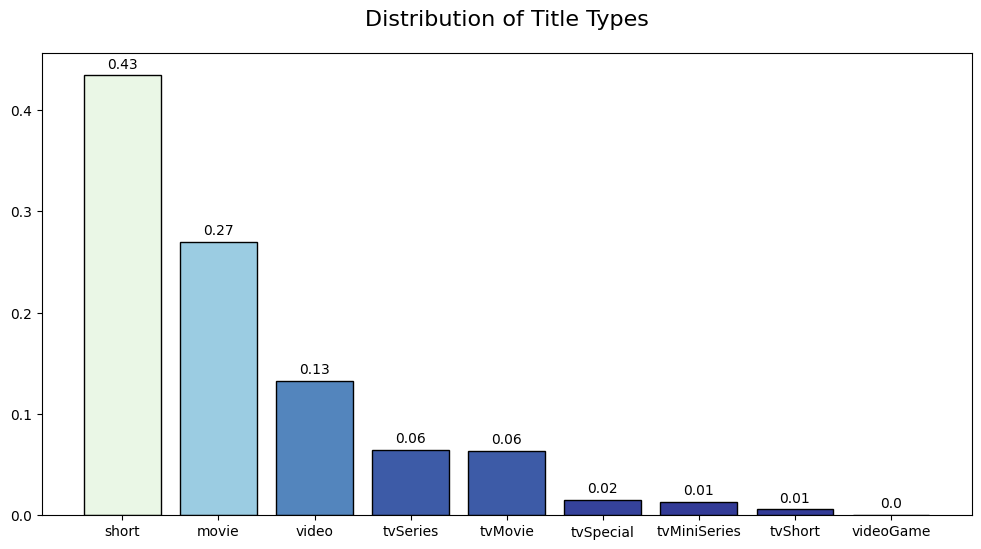

In [75]:
title_counts = content['titleType'].value_counts(normalize=True).to_frame()

plt.figure(figsize=(12, 6))
colors = plt.cm.RdYlBu_r(np.round(title_counts['proportion'],2))
bars = plt.bar(x=title_counts.index,height=title_counts['proportion'],color=colors,edgecolor='black')
  
plt.title('Distribution of Title Types', fontsize=16, pad=20)
plt.bar_label(bars,labels= np.round(title_counts['proportion'],2), padding=3)
plt.show();

In [77]:
ratings = pd.read_csv('title.ratings.tsv',sep='\t',low_memory=False)
ratings.shape

(1615604, 3)

In [78]:
ratings.isna().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [79]:
ratings[ratings.duplicated()]

,tconst,averageRating,numVotes


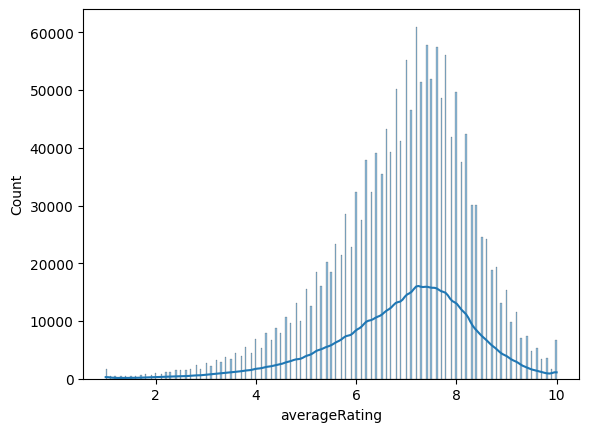

In [81]:
sns.histplot(ratings['averageRating'],kde=True)
plt.show();

In [82]:
final_data = pd.read_excel('Final Data.xlsx',index_col=0)

final_data.head()

,tconst,titleType,primaryTitle,startYear,genres,averageRating,numVotes,original_language
0,tt0000009,movie,Miss Jerry,1894,Romance,5.4,224,en
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",5.3,558,en
2,tt0000574,movie,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,987,en
3,tt0000591,movie,The Prodigal Son,1907,Drama,5.6,31,fr
4,tt0000615,movie,Robbery Under Arms,1907,Drama,3.9,28,en


In [83]:
final_data['Primary Genre'] = final_data['genres'].apply(lambda x: x.split(',')[0])
final_data.head()

,tconst,titleType,primaryTitle,startYear,genres,averageRating,numVotes,original_language,Primary Genre
0,tt0000009,movie,Miss Jerry,1894,Romance,5.4,224,en,Romance
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",5.3,558,en,Documentary
2,tt0000574,movie,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,987,en,Action
3,tt0000591,movie,The Prodigal Son,1907,Drama,5.6,31,fr,Drama
4,tt0000615,movie,Robbery Under Arms,1907,Drama,3.9,28,en,Drama


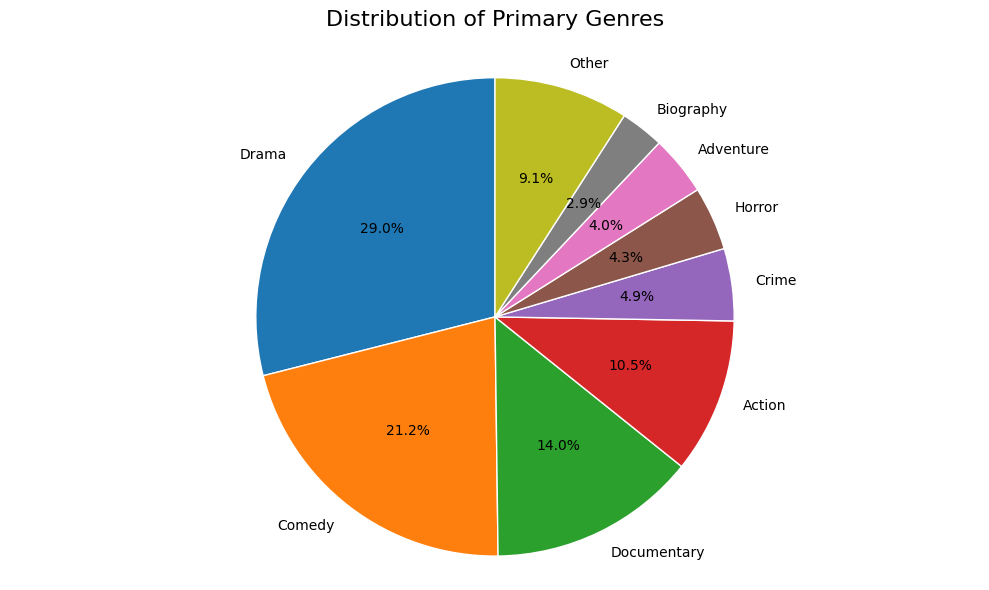

In [84]:
threshold = 0.02  # 2% threshold
genre_counts = final_data['Primary Genre'].value_counts(normalize=True)
other = genre_counts[genre_counts < threshold].sum()
genre_counts = genre_counts[genre_counts >= threshold]
genre_counts['Other'] = other

plt.figure(figsize=(10, 6))
plt.pie(
    genre_counts, 
    labels=genre_counts.index, 
    autopct='%1.1f%%',
    startangle=90,      
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},  
    textprops={'fontsize': 10}
)

plt.axis('equal')  
plt.title('Distribution of Primary Genres', fontsize=16, pad=20)
plt.tight_layout()
plt.show();